In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import datetime

In [8]:
Commbank = pd.read_excel('Price_History_Commonwealth_bank.xlsx',header=0, skiprows=11) # First 11 rows are not required as it is just text which isnt important, so the rows were skipped.
Commbank.info()

FileNotFoundError: [Errno 2] No such file or directory: 'Price_History_Commonwealth_bank.xlsx'

In [3]:
Commbank.describe()

,Close,%Chg,Volume
count,2198.000000,2198.000000,2.198000e+03
mean,59.419055,0.000219,3.397252e+06
std,8.073206,0.013013,2.054749e+06
min,31.617283,-0.100060,6.834970e+05
25%,53.622256,-0.005922,2.276530e+06
50%,58.115005,0.000506,2.904897e+06
75%,65.437205,0.006735,3.847194e+06
max,77.425059,0.132619,3.561303e+07


In [4]:
Commbank['Exchange Date']=pd.to_datetime(Commbank['Exchange Date'])
Commbank.set_index('Exchange Date', inplace=True)

In [5]:
Commbank.head()

,Close,%Chg,Volume
Exchange Date,,,
2012-01-03,51.162997,0.007924,3.186785e+06
2012-01-04,51.529780,0.007660,3.606286e+06
2012-01-05,50.596717,-0.006801,2.608491e+06
2012-01-06,50.360652,-0.002820,3.515135e+06
2012-01-09,50.292996,-0.002222,2.995256e+06


In [6]:
Commbank.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-16',
               ...
               '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03',
               '2020-09-04', '2020-09-07', '2020-09-08', '2020-09-09',
               '2020-09-10', '2020-09-11'],
              dtype='datetime64[ns]', name='Exchange Date', length=2198, freq=None)

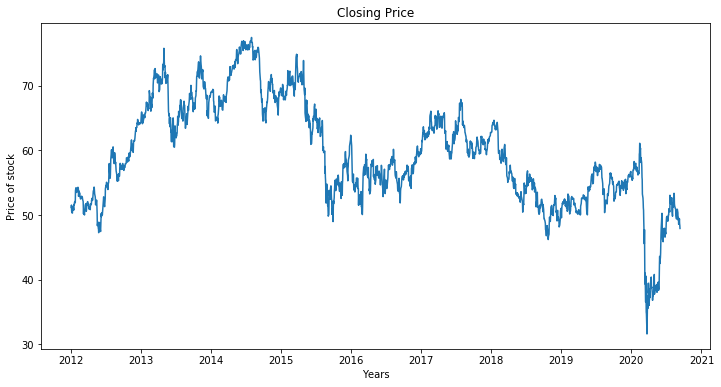

In [39]:
plt.figure(figsize = (12,6))
# Close_Price= Commbank['Close']
plt.plot(Commbank['Close'])
plt.xlabel('Years')
plt.title('Closing Price')
plt.ylabel('Price of stock')
plt.savefig('Close Price')
plt.show()

In [57]:
# last_100 = Close_Price.iloc[len(Close_Price)-100:len(Close_Price)]
# last_100_dates = Commbank.index[-100:]

last_100 = Commbank[-100:]
last_100
# last_100.head()
# last_100.tail()

,Close,%Chg,Volume
Exchange Date,,,
2020-04-24,37.594897,0.000850,4408844.0
2020-04-27,38.060025,0.000000,4215834.0
2020-04-28,38.037941,-0.004586,4608913.0
2020-04-29,40.031464,0.041972,3903547.0
2020-04-30,40.811145,0.026527,5477696.0
...,...,...,...
2020-09-07,49.004917,0.009591,2350246.0
2020-09-08,49.408811,0.016625,2062956.0
2020-09-09,48.636446,-0.024821,3026643.0


### Your Method

In [69]:
y_cap = []
for t in range(len(Commbank['Close'])-100, len(Commbank['Close'])):
    y_hat = Commbank['Close'][t] + 1*((Commbank['Close'][t]-51.163)/(t-1))
#     y_hat = last_100['Close'][t] + 1*((last_100['Close'][t]-51.163)/(t-1))
    
    y_cap.append(y_hat)

In [72]:
len(y_cap)

100

In [22]:
# df = pd.DataFrame(y_cap,columns=['Close'])

In [23]:
# df.columns

Index(['Close'], dtype='object')

In [74]:
last_100['predicted'] = np.array(y_cap)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
last_100

,Close,%Chg,Volume,predicted
Exchange Date,,,,
2020-04-24,37.594897,0.000850,4408844.0,37.588427
2020-04-27,38.060025,0.000000,4215834.0,38.053779
2020-04-28,38.037941,-0.004586,4608913.0,38.031688
2020-04-29,40.031464,0.041972,3903547.0,40.026163
2020-04-30,40.811145,0.026527,5477696.0,40.806218
...,...,...,...,...
2020-09-07,49.004917,0.009591,2350246.0,49.003933
2020-09-08,49.408811,0.016625,2062956.0,49.408011
2020-09-09,48.636446,-0.024821,3026643.0,48.635295


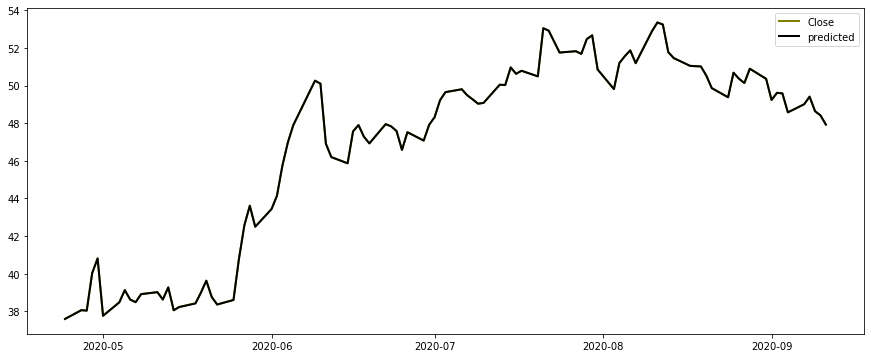

In [83]:
plt.figure(figsize = (15,6))
plt.plot(last_100.index, 'Close', data=last_100, marker='', color='olive', linewidth=2)
plt.plot(last_100.index, 'predicted', data=last_100, marker='', color='black', linewidth=2)
plt.legend()

In [84]:
plt.figure(figsize = (15,6))

plt.plot(last_100.tolist(),'b-',label="noised data")
plt.plot(y_cap,'r-',label="Rolling mean")

plt.show()

AttributeError: 'DataFrame' object has no attribute 'tolist'

<Figure size 1080x432 with 0 Axes>

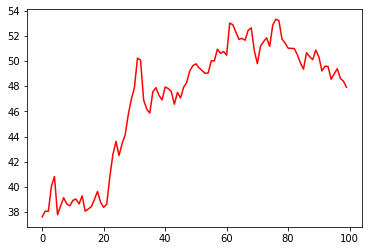

In [85]:
plt.plot(y_cap,'r-',label="Rolling mean")

In [90]:
from sklearn.metrics import mean_squared_error
from math import sqrt

RMSE = sqrt(mean_squared_error(last_100['Close'], last_100['predicted']))

In [91]:
print(RMSE) 

0.0030832259645250074


In [92]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [94]:
MAPE = mean_absolute_percentage_error(last_100['Close'], last_100['predicted'])
print('MAPE is %f' % MAPE)

MAPE is 0.005216


### My Method


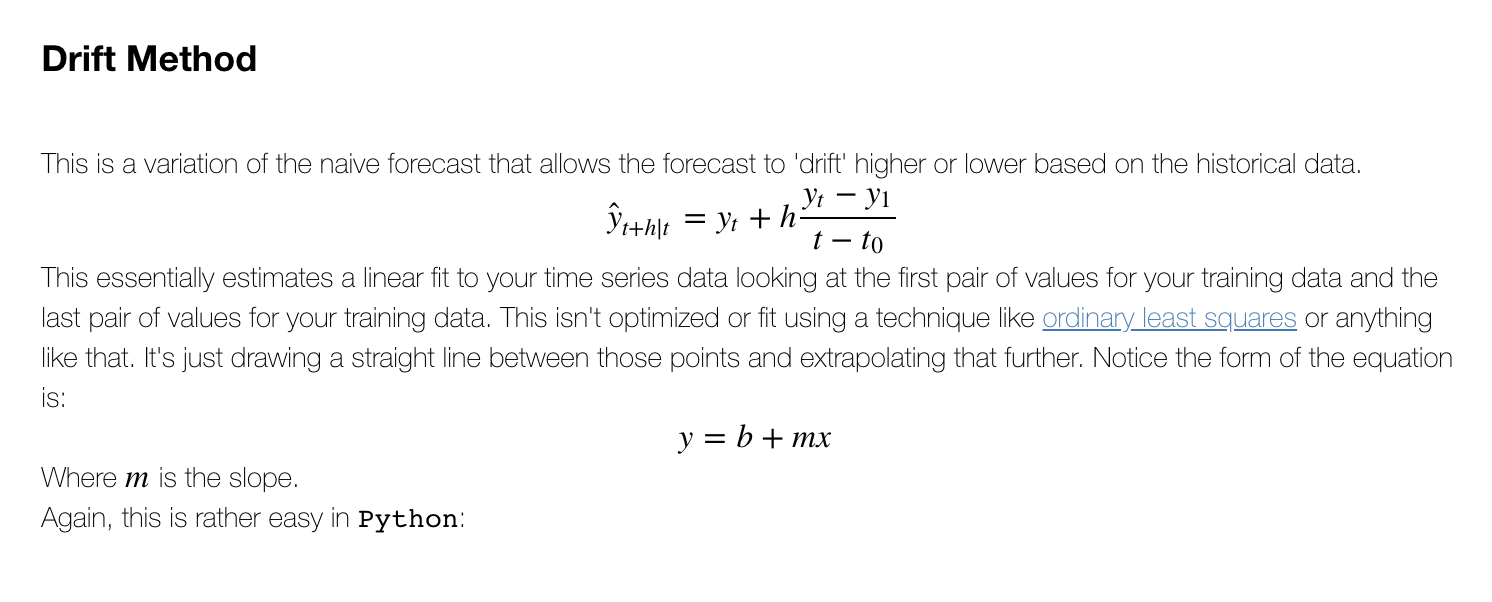

In [144]:
from IPython.display import Image 

Image("pic.png")

In [95]:
len(Commbank['Close'])-100

2098

In [ ]:
Y_cap = []
for t in range(len(Commbank['Close'])-100, len(Commbank['Close'])):
    y_hat = Commbank['Close'][t] + t*((Commbank['Close'][t]-51.163)/(t-1))
#     y_hat = last_100['Close'][t] + 1*((last_100['Close'][t]-51.163)/(t-1))
    
    Y_cap.append(y_hat)

In [101]:
len(last_100)

100

In [104]:
train = Commbank[:-100]
test = Commbank[-100:]

In [119]:
train

,Close,%Chg,Volume
Exchange Date,,,
2012-01-03,51.162997,0.007924,3.186785e+06
2012-01-04,51.529780,0.007660,3.606286e+06
2012-01-05,50.596717,-0.006801,2.608491e+06
2012-01-06,50.360652,-0.002820,3.515135e+06
2012-01-09,50.292996,-0.002222,2.995256e+06
...,...,...,...
2020-04-17,38.858554,-0.003265,3.484591e+06
2020-04-20,37.934027,-0.019325,3.866241e+06
2020-04-21,36.819563,-0.020875,4.261494e+06


In [105]:
test

,Close,%Chg,Volume
Exchange Date,,,
2020-04-24,37.594897,0.000850,4408844.0
2020-04-27,38.060025,0.000000,4215834.0
2020-04-28,38.037941,-0.004586,4608913.0
2020-04-29,40.031464,0.041972,3903547.0
2020-04-30,40.811145,0.026527,5477696.0
...,...,...,...
2020-09-07,49.004917,0.009591,2350246.0
2020-09-08,49.408811,0.016625,2062956.0
2020-09-09,48.636446,-0.024821,3026643.0


In [110]:
y_t = train['Close'][len(train['Close']) - 1]
m = (y_t - train['Close'][0]) / len(train)
y_hat_drift = test.copy().drop('Close', axis=1)
h = np.linspace(0,len(y_hat_drift)-1, len(y_hat_drift))
y_hat_drift['drift_forecast'] = y_t + m * h

In [118]:
y_hat_drift

,%Chg,Volume,drift_forecast
Exchange Date,,,
2020-04-24,0.000850,4408844.0,37.468712
2020-04-27,0.000000,4215834.0,37.462185
2020-04-28,-0.004586,4608913.0,37.455658
2020-04-29,0.041972,3903547.0,37.449130
2020-04-30,0.026527,5477696.0,37.442603
...,...,...,...
2020-09-07,0.009591,2350246.0,36.848618
2020-09-08,0.016625,2062956.0,36.842091
2020-09-09,-0.024821,3026643.0,36.835564


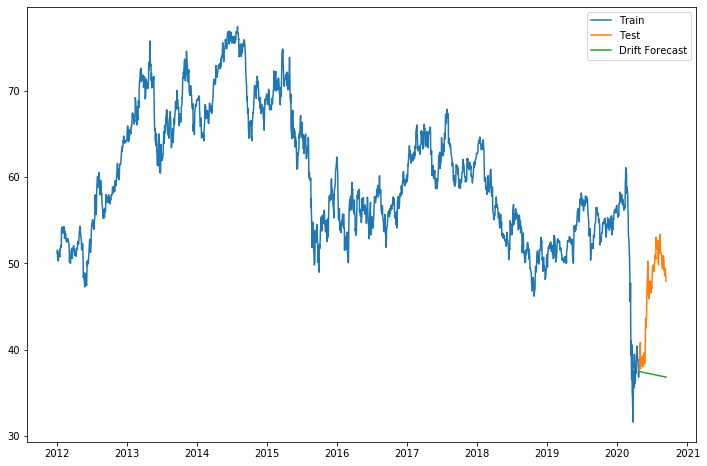

In [115]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(y_hat_drift.index, y_hat_drift['drift_forecast'], 
        label='Drift Forecast')
plt.legend(loc='best')
plt.show()

In [142]:
def mean_error(y_true, y_pred):
    import sklearn
    return "MAE is %f" % sklearn.metrics.mean_absolute_error(y_true, y_pred)

def RMSE(y_true, y_pred):
    import sklearn
    return "RMSE is %f" % sklearn.metrics.mean_squared_error(y_true, y_pred)

def mean_absolute_percentage_error(y_true, y_pred): 
    import numpy as np
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return "MAPE is %f" % (np.mean(np.abs((y_true - y_pred) / y_true)) * 100)

In [139]:
mean_error(test['Close'], y_hat_drift['drift_forecast'])

'MAE is 9.766638'

In [140]:
RMSE(test['Close'], y_hat_drift['drift_forecast'])

'RMSE is 121.318144'

In [143]:
mean_absolute_percentage_error(test['Close'], y_hat_drift['drift_forecast'])

'MAPE is 19.810808'

## Misc.

In [479]:
y_cap = []
t = 2099
for i,j in last_hundred.iterrows():
    y = j['Close'] + 1*((j['Close'] - 51.163)/(t -1)) 
    #y_cap = y_cap.append(y)
    y_cap.append(y)
    t +=1

In [480]:
y_cap

[37.5884299450994,
 38.053782207812354,
 38.031690562170745,
 40.02616585369892,
 40.806220343281666,
 37.75708689523891,
 38.47281061529998,
 39.12083079714242,
 38.61804605887939,
 38.477500407042385,
 38.90698096000674,
 39.01299847727647,
 38.620556916021144,
 39.26687402833755,
 38.04903515451008,
 38.22130563891769,
 38.41436574352349,
 38.98142603525723,
 39.62274171705827,
 38.754594630614854,
 38.35445256451803,
 38.5970619647726,
 40.77247170608503,
 42.56266028697038,
 43.6082676988602,
 42.49166787687693,
 43.429111127815574,
 44.13887761782181,
 45.73881841810668,
 46.967504520905415,
 47.88959428180023,
 50.25782727423298,
 50.098158280611,
 46.90684535218702,
 46.19268798646374,
 45.863999055380354,
 47.559993210848454,
 47.89742839635476,
 47.27696261474923,
 46.92019903562967,
 47.946681370585985,
 47.82931920858436,
 47.58006898002019,
 46.57497365675543,
 47.51738672415183,
 47.07128907072191,
 47.9120164082103,
 48.31372960488352,
 49.21448419759267,
 49.64724272907

In [486]:
d = last_hundred['Close'].tolist()

In [487]:
print(d)

[37.5948971056782, 38.0600246924753, 38.037940590461, 40.0314640621415, 40.8111451077404, 37.7634585269427, 38.4788392088319, 39.1265488262036, 38.624, 38.4835181962231, 38.9127922540039, 39.018756771837, 38.6264983859804, 39.2725066637408, 38.0552414795671, 38.2274275378586, 38.4203934665762, 38.9871829227642, 39.6281929491239, 38.7604531789479, 38.3604971834116, 38.6029892940345, 40.7773705878832, 42.5667132274572, 43.6118262161947, 42.4957504249575, 43.4327506049319, 44.1421815323948, 45.7413685739985, 46.9694760883298, 47.8911318138426, 50.258252237954, 50.0986579717041, 46.9088416723783, 46.1950181843135, 45.8664821860948, 47.5616808018504, 47.8989572220119, 47.2787810693048, 46.9221835075494, 47.9481850258592, 47.8308770033467, 47.5817424648497, 46.5771155924899, 47.5190878969357, 47.0731975179837, 47.9135320182764, 48.31505731709, 49.2153917503651, 49.647948388887, 49.801269088627, 49.4832184929984, 49.2651422586839, 49.0335338680927, 49.0738296068813, 50.0440626452853, 50.02440

<function matplotlib.pyplot.show(*args, **kw)>

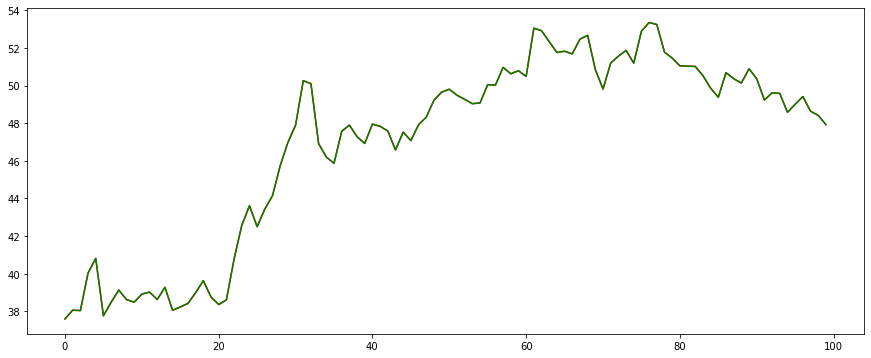

In [497]:
plt.figure(figsize = (15,6))
plt.plot((y_cap),'r-',label="noised data")
plt.plot(d,'g-',label="Rolling mean")

plt.show

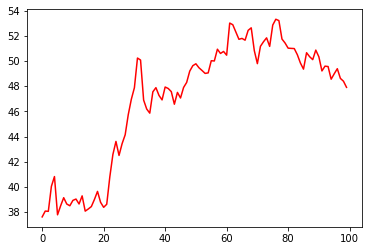

In [563]:
plt.plot((y_cap),'r-',label="noised data")

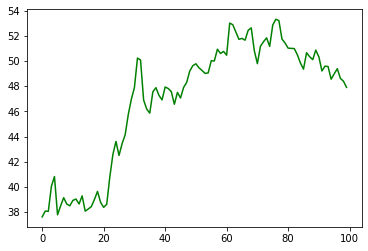

In [495]:
plt.plot(d,'g-',label="Rolling mean")

In [ ]:
plt.plot

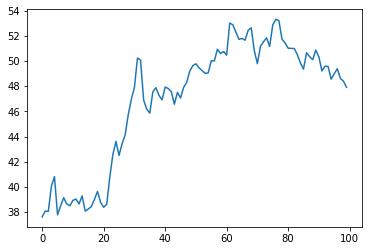

In [462]:
plt.plot(y_cap)

In [463]:
from pandas import DataFrame

In [464]:
df = DataFrame(y_cap,columns=['Close'])

In [465]:
b = df

In [466]:
b.head()

,Close
0,37.588430
1,38.053782
2,38.031691
3,40.026166
4,40.806220


In [321]:

Dates = pd.bdate_range(start='27-Apr-2020', end = '14-Sep-2020')
days=Dates.day
months = Dates.month
dates.get_loc('8-Jun-2020')

30

In [322]:
Dates.delete(30)

DatetimeIndex(['2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03',
               '2020-06-04', '2020-06-05', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12', '2020-06-15', '2020-06-16',
               '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-22',
               '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
               '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02',
               '2020-07-03', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-13', '2020-07-14',
      

In [324]:
ds=Dates.to_frame()

In [325]:
ds

,0
2020-04-27,2020-04-27
2020-04-28,2020-04-28
2020-04-29,2020-04-29
2020-04-30,2020-04-30
2020-05-01,2020-05-01
...,...
2020-09-08,2020-09-08
2020-09-09,2020-09-09
2020-09-10,2020-09-10
2020-09-11,2020-09-11


In [333]:
new_df=pd.concat([ds,b], axis =1)

In [334]:
new_df

,0,Close
1970-01-01 00:00:00.000000000,NaT,NaN
1970-01-01 00:00:00.000000001,NaT,NaN
1970-01-01 00:00:00.000000002,NaT,NaN
1970-01-01 00:00:00.000000003,NaT,NaN
1970-01-01 00:00:00.000000004,NaT,NaN
...,...,...
2020-09-08 00:00:00.000000000,2020-09-08,NaN
2020-09-09 00:00:00.000000000,2020-09-09,NaN
2020-09-10 00:00:00.000000000,2020-09-10,NaN
2020-09-11 00:00:00.000000000,2020-09-11,NaN


In [ ]:
result= pd.merge(ds,b)

In [326]:
b

,Close
0,37.588430
1,38.053782
2,38.031691
3,40.026166
4,40.806220
...,...
95,49.003933
96,49.408012
97,48.635295
98,48.410772


In [272]:
b['Date']=pd.to_datetime(b['Date'])
b.set_index('Date', inplace=True)

KeyError: 'Date'

In [273]:
b

,Close
0,37.588430
1,38.053782
2,38.031691
3,40.026166
4,40.806220
...,...
95,49.003933
96,49.408012
97,48.635295
98,48.410772


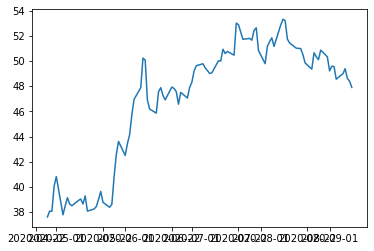

In [168]:
plt.plot(b['Close'])

In [123]:
b.head()

,Close,Date
0,37.588430,2020-04-27
1,38.053782,2020-04-28
2,38.031691,2020-04-29
3,40.026166,2020-04-30
4,40.806220,2020-05-01


In [124]:
b.tail()

,Close,Date
95,49.003933,2020-09-07
96,49.408012,2020-09-08
97,48.635295,2020-09-09
98,48.410772,2020-09-10
99,47.920684,2020-09-11


In [468]:
b['Date']= pd.bdate_range(start='27-Apr-2020',end = '7-Jun-2020',freq='B')

ValueError: Length of values does not match length of index

In [ ]:
b.head()

In [444]:
b['Date']=pd.to_datetime(b['Date'])
b.set_index('Date', inplace=True)


,Close
Date,
2020-04-27,37.588430
2020-04-28,38.053782
2020-04-29,38.031691
2020-04-30,40.026166
2020-05-01,40.806220


In [445]:
b.tail()

,Close
Date,
2020-09-07,49.003933
2020-09-08,49.408012
2020-09-09,48.635295
2020-09-10,48.410772
2020-09-11,47.920684


In [133]:
b

,Close
Date,
2020-04-27,37.588430
2020-04-28,38.053782
2020-04-29,38.031691
2020-04-30,40.026166
2020-05-01,40.806220
...,...
2020-09-07,49.003933
2020-09-08,49.408012
2020-09-09,48.635295


In [362]:
plt.figure(figsize = (15,6))

plt.plot(last_hundred.tolist(),'r-',label="noised data")
plt.plot(b['Close'],'b-',label="Rolling mean")

plt.show()

AttributeError: 'DataFrame' object has no attribute 'tolist'

<Figure size 1080x432 with 0 Axes>

# c) MA - 4 Smoothing

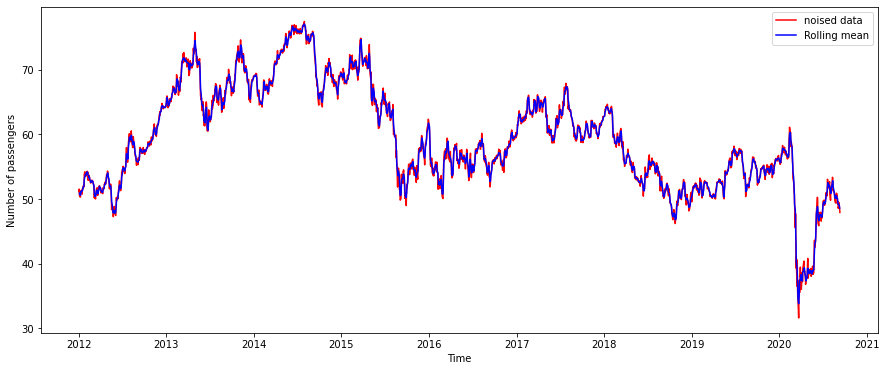

In [342]:
rolling_data = ts.rolling(4,center=True)
plt.figure(figsize = (15,6))
plt.plot(Close_Price,'r-',label="noised data")
plt.plot(rolling_data.mean(),'b-',label="Rolling mean")
plt.xlabel('Time')
plt.ylabel('Number of passengers')
plt.legend()
plt.savefig('Smoothed Time Series')
plt.show()

In [12]:
rolling_data.mean().head()

Exchange Date
2012-01-03          NaN
2012-01-04          NaN
2012-01-05    50.912537
2012-01-06    50.695037
2012-01-09    50.571629
Name: Close, dtype: float64

# d) Stock Return

In [343]:
data_shift = Close_Price.shift(1) 

In [346]:
a = np.log(Close_Price)

In [348]:
b = np.log(data_shift)

In [350]:
r = a-b

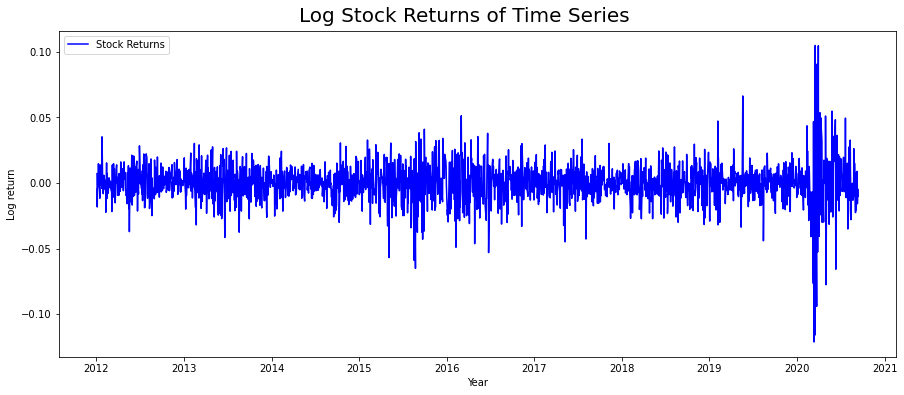

In [354]:
plt.figure(figsize = (15,6))
plt.plot(r,'b', label = 'Stock Returns')
plt.xlabel("Year")
plt.ylabel("Log return")
plt.legend(loc = 'best')
plt.figtext(.5,.9,"Log Stock Returns of Time Series" ,fontsize = 20, ha = 'center')
plt.savefig('Stock Returns')
plt.show()

In [36]:
r.describe()

count    2197.000000
mean       -0.000030
std         0.014909
min        -0.121275
25%        -0.007343
50%         0.000234
75%         0.007896
max         0.104889
Name: Close, dtype: float64

In [37]:
r.mean()

-2.9785409479206138e-05

In [38]:
r.std()

0.014909189345922683

In [39]:
r.var()

0.00022228392695257442

In [40]:
r.kurtosis()

9.463105708238082

In [26]:
r.skew()

-0.4804283833786595

# e) Return Dataset

In [499]:
r_train = r.iloc[1:len(r)-100]
r_test = r.iloc[len(r)-100:len(r)]

In [500]:
print(r_train.head(10))
print(r_test.head(10))

Exchange Date
2012-01-04    0.007143
2012-01-05   -0.018273
2012-01-06   -0.004677
2012-01-09   -0.001344
2012-01-10    0.014668
2012-01-11    0.003302
2012-01-12    0.002207
2012-01-13    0.000496
2012-01-16   -0.011639
2012-01-17    0.013800
Name: Close, dtype: float64
Exchange Date
2020-04-24    0.003362
2020-04-27    0.012296
2020-04-28   -0.000580
2020-04-29    0.051082
2020-04-30    0.019289
2020-05-01   -0.077613
2020-05-04    0.018767
2020-05-05    0.016693
2020-05-06   -0.012927
2020-05-07   -0.003644
Name: Close, dtype: float64


In [501]:
def sse(x, r_train):
    return np.sum(np.power(x-r_train,2))

In [502]:
sse_one = []
alphas = np.arange(0.01,1,0.01)

for i in alphas:
    smoothed = r_train.ewm(alpha = i, adjust=False).mean()
    sse_one.append(sse(smoothed[:-1], r_train.values[1:]))

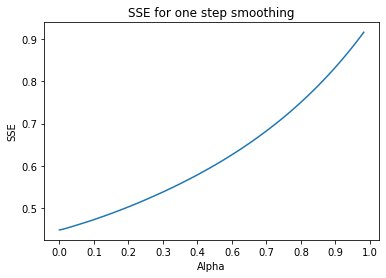

In [503]:
plt.figure()
plt.plot(sse_one)
plt.title("SSE for one step smoothing")
plt.ylabel("SSE")
plt.xlabel("Alpha")
plt.xticks(np.linspace(0, 100, 10), ["{0:1.1f}".format(x) for x in np.linspace(0,1,10)])
plt.show()

In [504]:
optimal_alpha_one = alphas[np.argmin(sse_one)]
print("Optimal Alpha for 1-step forecast {:.2f}".format(optimal_alpha_one))

Optimal Alpha for 1-step forecast 0.01


In [558]:
alpha = 0.01
lt_manual = [r_train[0:4].mean()] # this is l0 in the method
print(lt_manual)

[-0.004287681098535723]


In [559]:
# Start from l1
for t in range(1,len(r_test)):
    # Calculate smoothed value at time t
    l_t = alpha*r_test[t]+(1-alpha)*lt_manual[t-1]
    
    # Append this smoothed values to the list
    lt_manual.append(l_t)
#len(stk_ret_test)
 #   lt = np.array(lt_manual)
#print(lt.describe())
   # stk_ret_test.describe()

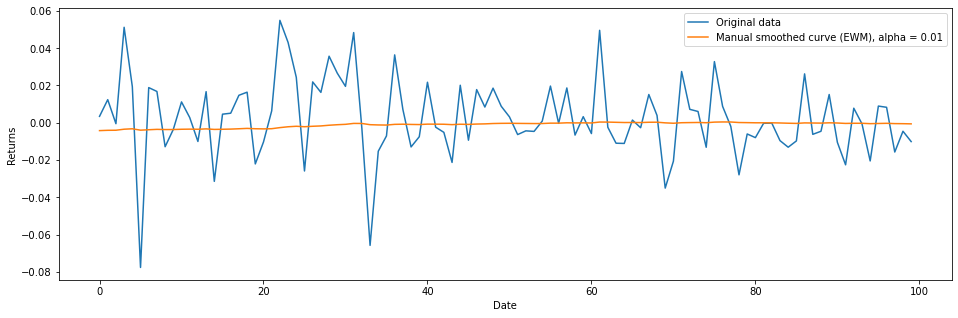

In [560]:
plt.figure(figsize=(16,5))
plt.plot(r_test.tolist(), label = "Original data")
plt.plot(lt_manual, label = "Manual smoothed curve (EWM), alpha = 0.01")
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [561]:
def mape(r_test,smoothed):
    smoothed = np.array(lt_manual)
    return np.mean(np.abs((r_test - smoothed) / r_test)) * 100
print("MAPE = ", mape(r_test,smoothed))

def mae(r_test,smoothed):
    smoothed = np.array(lt_manual)
    return np.mean(np.abs((r_test - smoothed)))
print("MAE = ",mae(r_test, smoothed))

MAPE =  107.0968159668857
MAE =  0.015633526197674958


# f) Squared Return Set

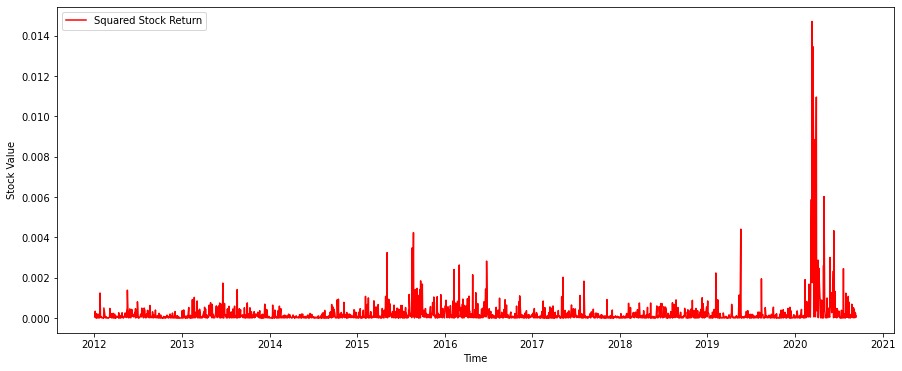

In [55]:
xt = np.power(r,2)

plt.figure(figsize = (15,6))
plt.plot(xt,'r-',label="Squared Stock Return")
plt.xlabel('Time')
plt.ylabel('Stock Value')
plt.legend()
plt.show()

In [56]:
xt_train = xt.iloc[1:len(xt)-100]
xt_test = xt.iloc[len(xt)-100:len(xt)]
print(xt_train.tail(10))
print(xt_test.head(10))

Exchange Date
2020-04-08    5.845930e-04
2020-04-09    2.475885e-03
2020-04-14    1.025290e-03
2020-04-15    9.011307e-04
2020-04-16    1.335164e-04
2020-04-17    5.775245e-06
2020-04-20    5.798321e-04
2020-04-21    8.891851e-04
2020-04-22    3.008049e-04
2020-04-23    1.774255e-08
Name: Close, dtype: float64
Exchange Date
2020-04-24    1.130357e-05
2020-04-27    1.511962e-04
2020-04-28    3.368786e-07
2020-04-29    2.609335e-03
2020-04-30    3.720833e-04
2020-05-01    6.023821e-03
2020-05-04    3.521826e-04
2020-05-05    2.786488e-04
2020-05-06    1.671174e-04
2020-05-07    1.327724e-05
Name: Close, dtype: float64


In [81]:
def sse(x2, xt_train):
    return np.sum(np.power(x2-xt_train,2))

In [82]:
sse2_one = []
alphas2 = np.arange(0.01,1,0.01)

for i in alphas2:
    smoothed2 = xt_train.ewm(alpha = i, adjust=False).mean()
    sse2_one.append(sse2(smoothed2[:-1], xt_train.values[1:]))

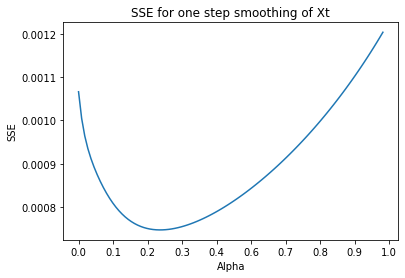

In [83]:
plt.figure()
plt.plot(sse2_one)
plt.title("SSE for one step smoothing of Xt")
plt.ylabel("SSE")
plt.xlabel("Alpha")
plt.xticks(np.linspace(0, 100, 10), ["{0:1.1f}".format(x) for x in np.linspace(0,1,10)])
plt.show()

In [84]:
optimal_alpha_two = alphas2[np.argmin(sse2_one)]
print("Optimal Alpha for 1-step forecast {:.2f}".format(optimal_alpha_two))

Optimal Alpha for 1-step forecast 0.27


In [85]:
alpha = 0.27
lt_manual1 = [xt_train[0:5].mean()] # this is l0 in the method
print(lt_manual1)

[0.0001247548124252955]


In [86]:
# Start from l1
for t in range(1,len(xt_test)):
    # Calculate smoothed value at time t
    l_t1 = alpha*xt_test[t]+(1-alpha)*lt_manual1[t-1]
    
    # Append this smoothed values to the list
    lt_manual1.append(l_t1)
#len(lt_manual1)
 #   lt = np.array(lt_manual)
#print(lt.describe())
   # stk_ret_test.describe()

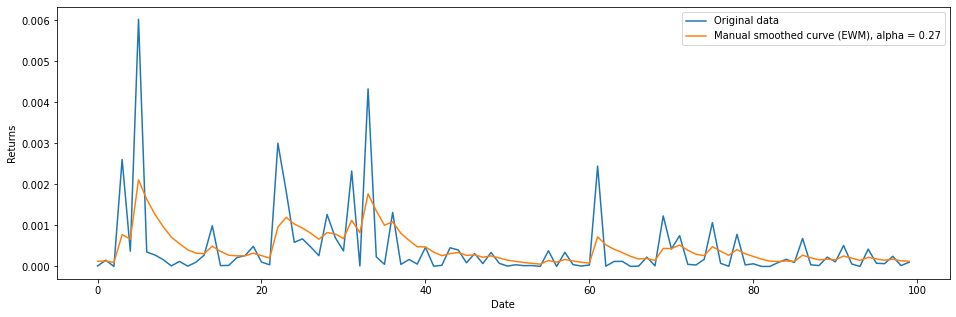

In [79]:
plt.figure(figsize=(16,5))
plt.plot(xt_test.tolist(), label = "Original data")
plt.plot(lt_manual1, label = "Manual smoothed curve (EWM), alpha = 0.27")
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [87]:
def mape(xt_test,smoothed):
    smoothed = np.array(lt_manual)
    return np.mean(np.abs((xt_test - smoothed) / xt_test)) * 100
print("MAPE = ", mape(xt_test,smoothed))

def mae(xt_test,smoothed):
    smoothed = np.array(lt_manual1)
    return np.mean(np.abs((xt_test - smoothed)))
print("MAE = ",mae(xt_test, smoothed))

MAPE =  3629.050205725528
MAE =  0.00038202178295660647
